In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('Data2_Social_Network.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [6]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
X_train

array([[    24,  27000],
       [    30,  79000],
       [    24,  55000],
       [    35,  25000],
       [    20,  74000],
       [    46,  23000],
       [    31,  74000],
       [    37,  55000],
       [    27,  17000],
       [    23,  48000],
       [    31,  58000],
       [    32, 117000],
       [    26,  16000],
       [    48,  29000],
       [    31,  76000],
       [    20,  82000],
       [    27,  58000],
       [    37,  33000],
       [    18,  44000],
       [    38,  61000],
       [    28,  59000],
       [    35,  50000],
       [    22,  81000],
       [    35,  53000],
       [    30,  89000],
       [    31,  71000],
       [    26,  86000],
       [    18,  82000],
       [    47,  30000],
       [    28,  59000],
       [    40,  59000],
       [    25,  79000],
       [    28,  89000],
       [    27,  89000],
       [    23,  66000],
       [    26,  43000],
       [    32, 117000],
       [    34,  43000],
       [    42,  65000],
       [    30,  15000],


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train

array([[-0.83290811, -1.11270551],
       [-0.0322416 ,  0.62614933],
       [-0.83290811, -0.17639906],
       [ 0.63498049, -1.17958454],
       [-1.36668578,  0.45895175],
       [ 2.10286908, -1.24646357],
       [ 0.10120281,  0.45895175],
       [ 0.90186932, -0.17639906],
       [-0.43257486, -1.44710067],
       [-0.96635253, -0.41047567],
       [ 0.10120281, -0.07608051],
       [ 0.23464723,  1.89685094],
       [-0.56601928, -1.48054019],
       [ 2.36975792, -1.04582648],
       [ 0.10120281,  0.52583078],
       [-1.36668578,  0.72646788],
       [-0.43257486, -0.07608051],
       [ 0.90186932, -0.91206841],
       [-1.63357462, -0.54423374],
       [ 1.03531374,  0.02423804],
       [-0.29913044, -0.04264099],
       [ 0.63498049, -0.34359664],
       [-1.09979695,  0.69302836],
       [ 0.63498049, -0.24327809],
       [-0.0322416 ,  0.96054449],
       [ 0.10120281,  0.3586332 ],
       [-0.56601928,  0.86022594],
       [-1.63357462,  0.72646788],
       [ 2.2363135 ,

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', p=1)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
print(y_pred)
print(y_test)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 1 0 1 1 0 1 0 0]


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[38  0]
 [ 5  7]]


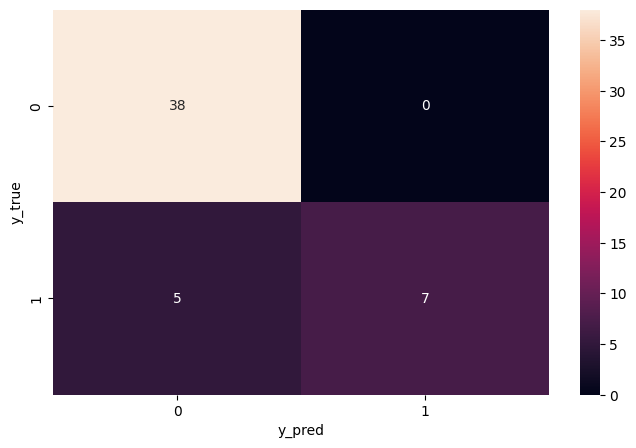

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [16]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        38
           1       1.00      0.58      0.74        12

    accuracy                           0.90        50
   macro avg       0.94      0.79      0.84        50
weighted avg       0.91      0.90      0.89        50



<ipython-input-17-db5b0d75197c>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


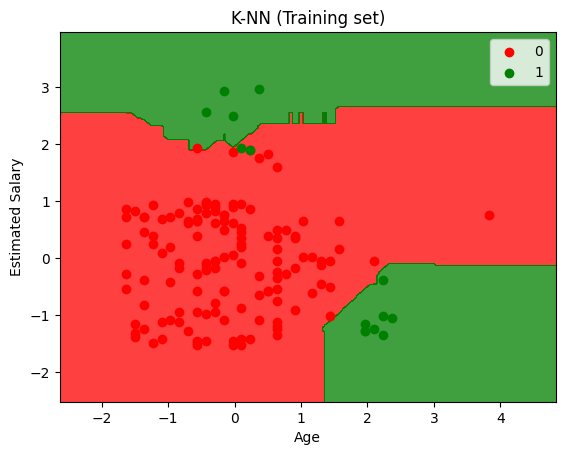

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()